<a href="https://colab.research.google.com/github/Ahmad08017928/Ahmad08017928/blob/main/metode_kkn_dan_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# A. Import Data






In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1




# 1.   Data Understanding





In [4]:
df["stroke"]

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


dari data di atas kita bisa simpulkan bahwa orang terkena stroke memiliki index bmi maksimal 97,6 dan yang paling rendah di index 10,3

In [8]:
df.shape

(5110, 12)

# 2. Cleaning Data

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [12]:
df["bmi"].isnull().sum()

201

In [14]:
presentase_data_yang_hilang = df["bmi"].isna().mean()*100
print("presentase data yang hilang adalah {:.1f}%".format(presentase_data_yang_hilang))

presentase data yang hilang adalah 3.9%


In [18]:
modus = (df["bmi"].median())
print("jumlah modus {:.1f}%".format(modus))

jumlah modus 28.1%


In [22]:
df1 = df.copy()
df1["bmi"].fillna(value=df1["bmi"].median(), inplace=True)
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [23]:
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [41]:
d = df1.drop("id", axis="columns")
d

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 3. Exploratory Data Analysis (EDA)

In [46]:
df.corr()

<ipython-input-46-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<ipython-input-47-8163a89d0f3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(d.corr(), cmap='BuPu')


<Axes: >

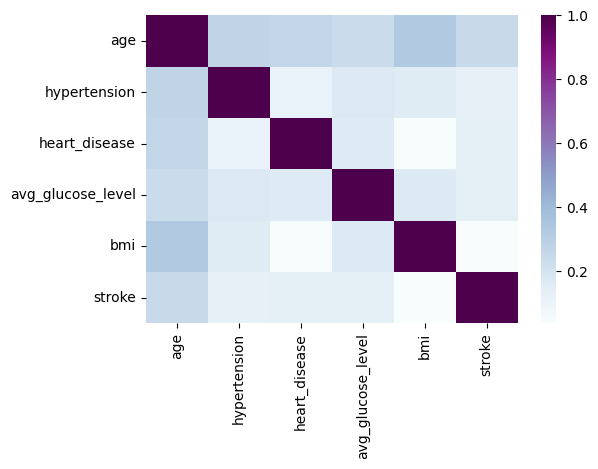

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(d.corr(), cmap='BuPu')

**Dari Visualisasi di atas kita dapat simpulkan bahwa nilai dengan correlasi cukup baik adalah correlasi antara age dengan bmi**

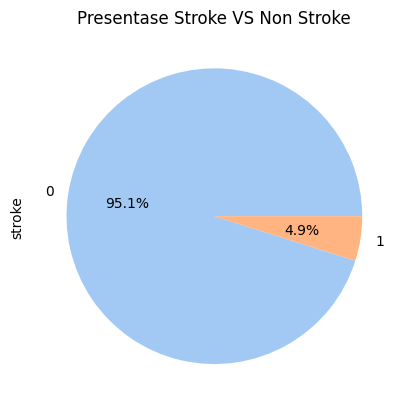

<ipython-input-45-16b21dda0752>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=d, x='stroke', palette='rocket')


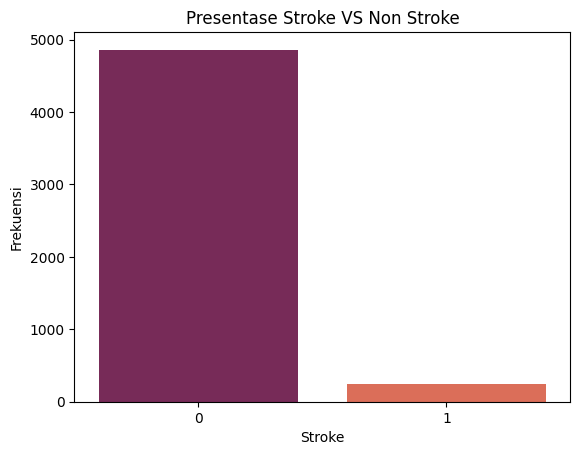

In [45]:
sns.set_palette('pastel')
d["stroke"].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title('Presentase Stroke VS Non Stroke')
plt.show()

sns.countplot(data=d, x='stroke', palette='rocket')

plt.title("Presentase Stroke VS Non Stroke")
plt.xlabel("Stroke")
plt.ylabel("Frekuensi")
plt.show()

**Dari Visualisasi di atas kita bisa simpulkan bahwa orang yang terkena stroke lebih sedikit dari pada orang yang tidak terkena Stroke**

# 4. Preparation Data



In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [43]:
Numerik = LabelEncoder()
x = d.drop('stroke', axis='columns')
y = d["stroke"]

In [48]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [49]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [51]:
d.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [53]:
x['gender_n'] = Numerik.fit_transform(x['gender'])
x['ever_married_n'] = Numerik.fit_transform(x['ever_married'])
x['work_type_n'] = Numerik.fit_transform(x['work_type'])
x['Residence_type_n'] = Numerik.fit_transform(x['Residence_type'])
x['smoking_status_n'] = Numerik.fit_transform(x['smoking_status'])

In [54]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender_n,ever_married_n,work_type_n,Residence_type_n,smoking_status_n
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,2,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,0,1,3,0,2
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,2,0,2
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,0,1,2,1,3
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,1,2,1,2
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,3,1,2
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,1,3,0,2
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,1,1,2,0,1


In [55]:
x_d = x.drop(["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], axis='columns')

In [56]:
x_d

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_n,ever_married_n,work_type_n,Residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,2,1,1
1,61.0,0,0,202.21,28.1,0,1,3,0,2
2,80.0,0,1,105.92,32.5,1,1,2,0,2
3,49.0,0,0,171.23,34.4,0,1,2,1,3
4,79.0,1,0,174.12,24.0,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,1,2,1,2
5106,81.0,0,0,125.20,40.0,0,1,3,1,2
5107,35.0,0,0,82.99,30.6,0,1,3,0,2
5108,51.0,0,0,166.29,25.6,1,1,2,0,1


In [59]:
classification = GaussianNB()
classification.fit(x_d, y)

GaussianNB()

In [60]:
classification.score(x_d, y)

0.8667318982387475

In [61]:
classification.predict([[35, 1, 0, 228, 24, 0, 1, 3, 1, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [62]:
x_d_train, x_d_test, y_train, y_test = train_test_split(x_d, y, test_size=0.35, random_state=50)

In [63]:
print(len(x_d_train))

4088


In [64]:
print(len(x_d_test))

1022


# classification knn

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_d_train)
x_test = sc.transform(x_d_test)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
klasifikasi = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
klasifikasi.fit(x_d_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred = klasifikasi.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [69]:
from sklearn.metrics import confusion_matrix
knn = confusion_matrix(y_test, y_pred)
print(knn)

[[974   0]
 [ 48   0]]


In [77]:
from sklearn.metrics import classification_report, accuracy_score
akurasi = classification_report(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print(akurasi)
print("Tingkat akurasi knn %d persen"%(score*100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       974
           1       0.00      0.00      0.00        48

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022

Tingkat akurasi knn 95 persen


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Dari Metode Pengujian Knn Mendapatkan Score 95 persen**

# Metode SVM

In [78]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(x_d_train, y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akuransi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       974
           1       0.00      0.00      0.00        48

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022

Akuransi SVM : 95.30%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

**Dari Metode Pengujian Svm Mendapatkan score 95.30 persen**

# kesimpulan

 Bahwa dari 2 metode pengujian yang saya pakai saya mendapatkan score 95.30 persen dari metode svm

# Testing classification

In [86]:
test = [[35, 1, 0, 228, 24, 1, 1, 3, 1, 2]]

**Hasil Metode KNN**

In [87]:
hasil_knn = klasifikasi.predict(test)
print(hasil_knn)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Hasil Metode SVM**

In [88]:
hasil_svm = clf.predict(test)
print(hasil_svm)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
